<style type="text/css">
    pre {
        max-height: 500px!important;
        overflow:scroll;
    }
    div.slides {
        background: no-repeat url(‘your background image url’);
    }
</style>

<link rel="stylesheet" href="reveal.js/css/theme/sky.css" id="theme">

# Create some summary statistics

In [20]:
# Read in all the libraries and data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

county_data = pd.read_csv("C:\\[path]\\project_4770_7770.csv",
                          index_col='Row.Label')

# Note that Y-variable is health index. Calculate Health Index as 1 - Poor.Health. 
county_data['Health_Index'] = 1 - county_data['Poor.Health']

# Group by State and calculate mean Health Index for each state, then sort
state_health_summary = county_data.groupby('State.Abbreviation')['Health_Index'].mean().sort_values()

# Extract top 5 and bottom 5 states
top_5_states = state_health_summary.tail(5)
bottom_5_states = state_health_summary.head(5)

# Output results
print("Top 5 States with Highest Health Index:")
print(top_5_states)

print("\nBottom 5 States with Lowest Health Index:")
print(bottom_5_states)

Top 5 States with Highest Health Index:
State.Abbreviation
MN    0.876813
RI    0.878220
SD    0.880333
VT    0.883758
CT    0.886683
Name: Health_Index, dtype: float64

Bottom 5 States with Lowest Health Index:
State.Abbreviation
AR    0.768374
AL    0.770306
WV    0.774953
MS    0.776428
KY    0.778881
Name: Health_Index, dtype: float64


# Review Y-variable’s association with some of the potential predictor variables (discription needed)

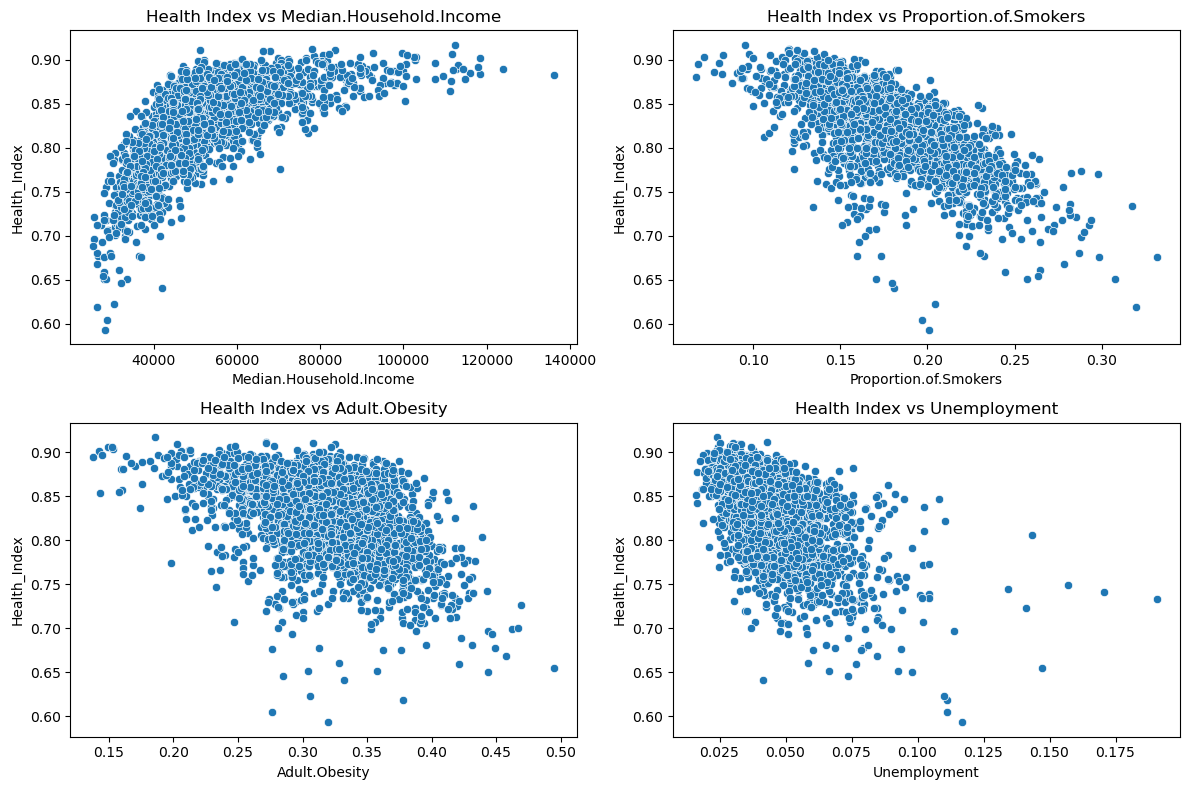

In [4]:
# Select a few predictor variables for analysis
predictors = ['Median.Household.Income', 'Proportion.of.Smokers', 'Adult.Obesity', 'Unemployment']

# Create a grid of scatter plots to visualize the association between predictors and Health Index
plt.figure(figsize=(15/1.25, 10/1.25))
for i, predictor in enumerate(predictors, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=county_data, x=predictor, y='Health_Index')
    plt.title(f'Health Index vs {predictor}')

plt.tight_layout()
plt.savefig("4_scatter_plots.png", dpi=500)
plt.show()

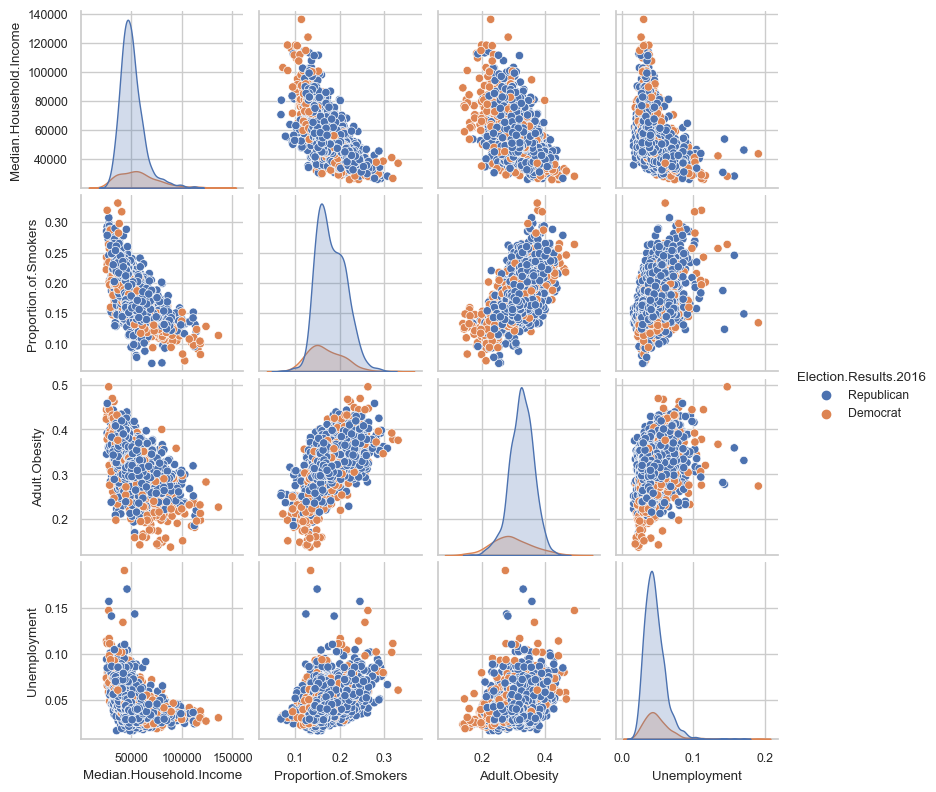

In [5]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

scatterplot_vars = ['Median.Household.Income', 'Proportion.of.Smokers', 'Adult.Obesity', 'Unemployment', 'Election.Results.2016']
tmp_data = county_data[scatterplot_vars].copy()  

# Change the style and scale of the plot
sns.set(style="whitegrid", font_scale=0.8)

# Create the scatterplot matrix
pairplot = sns.pairplot(tmp_data, hue='Election.Results.2016', height=2)
plt.savefig("scatter_plots_matrix.png", dpi=600)
plt.show()

# Look at the relationship between some of the predictor variables themselves

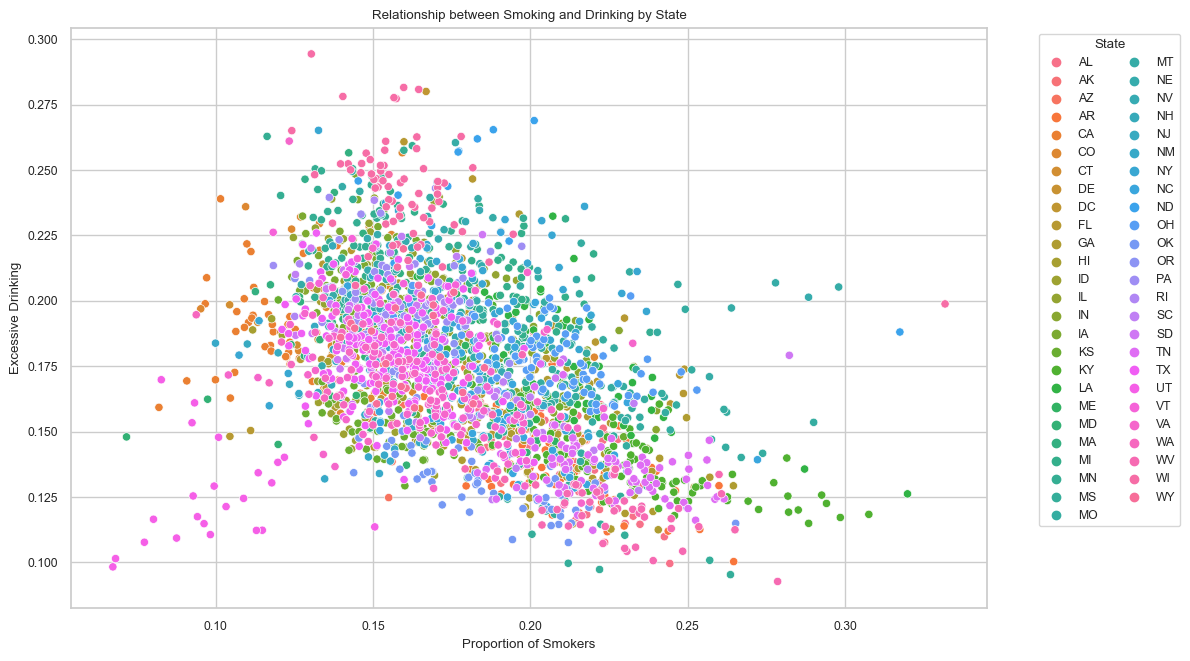

In [6]:
# Scatter plot to visualize the relationship between smoking and drinking, colored by State
plt.figure(figsize=(12, 6.7))
sns.scatterplot(data=county_data, x='Proportion.of.Smokers', y='Excessive.Drinking', hue='State.Abbreviation')
plt.title('Relationship between Smoking and Drinking by State')
plt.xlabel('Proportion of Smokers')
plt.ylabel('Excessive Drinking')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc=2, ncol=2) 
plt.tight_layout()
plt.savefig("color1.png", dpi=600)
plt.show()

# Look at the relationship between some of the predictor variables themselves (2)

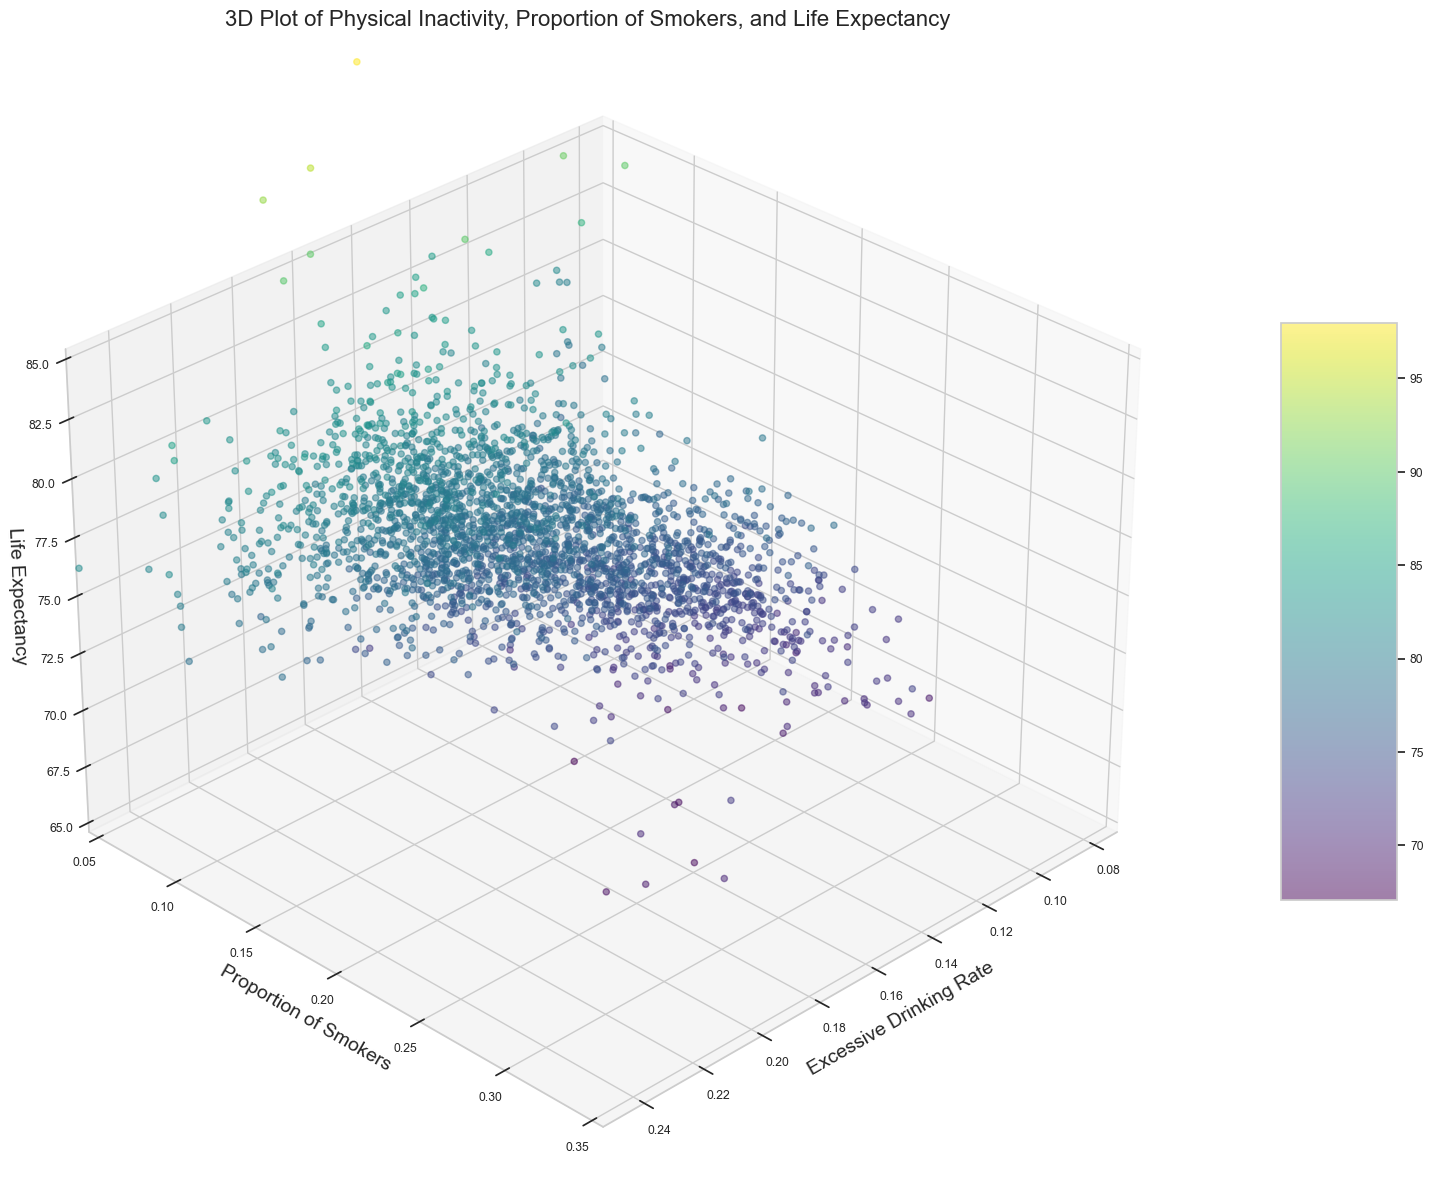

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3D Plot of Physical Inactivity, Proportion of Smokers, and Life Expectancy', fontsize=16)
sc = ax.scatter(county_data['Excessive.Drinking'], county_data['Proportion.of.Smokers'], county_data['Life.Expectancy'], 
           c=county_data['Life.Expectancy'], cmap='viridis', s=20, alpha=0.5)
ax.set_xlabel('Excessive Drinking Rate', fontsize= 14)
ax.set_ylabel('Proportion of Smokers', fontsize= 14)
ax.set_zlabel('Life Expectancy', fontsize= 14)

ax.set_xlim(0.075, 0.25)
ax.set_ylim(0.05, 0.35)
ax.set_zlim(65, 85)

ax.view_init(elev=30, azim=45)

plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
plt.savefig("3d_1.png", dpi=300)
plt.show()

# Look at the relationship between some of the predictor variables themselves (3)

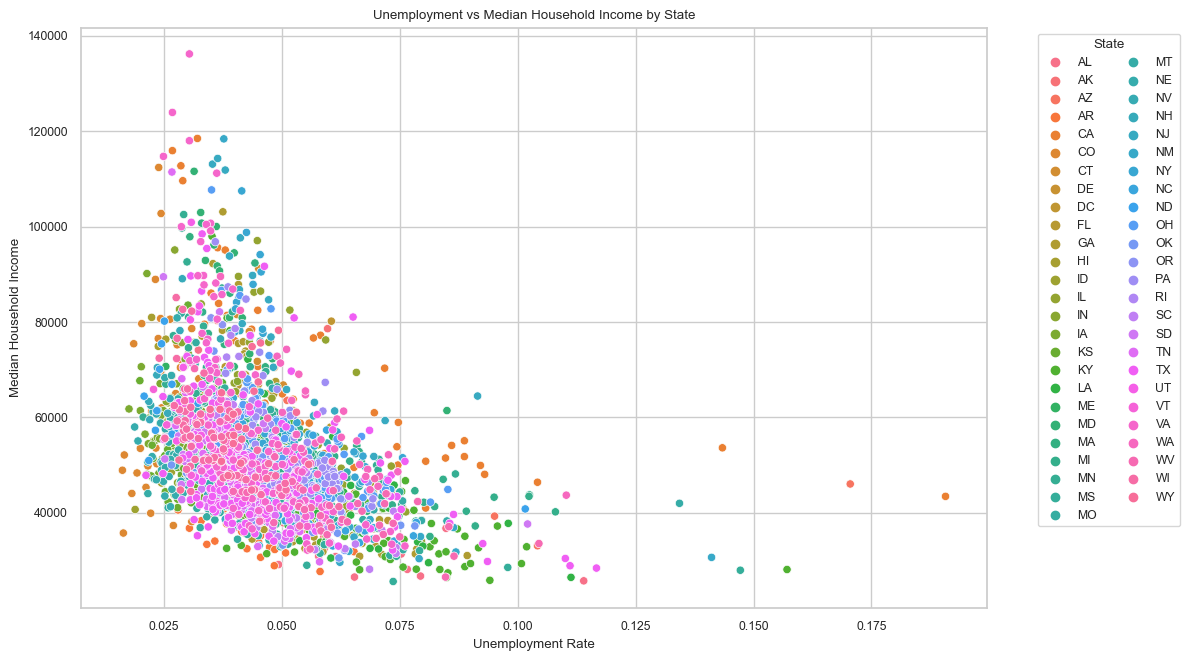

In [25]:
# Relationship between Unemployment and Median Household Income
plt.figure(figsize=(12, 6.7))
sns.scatterplot(data=county_data, x='Unemployment', y='Median.Household.Income', hue='State.Abbreviation')
plt.title('Unemployment vs Median Household Income by State')
plt.xlabel('Unemployment Rate')
plt.ylabel('Median Household Income')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc=2, ncol=2) 
plt.tight_layout()
plt.savefig("color2.png", dpi=500)
plt.show()

# Look at the relationship between some of the predictor variables themselves (4)

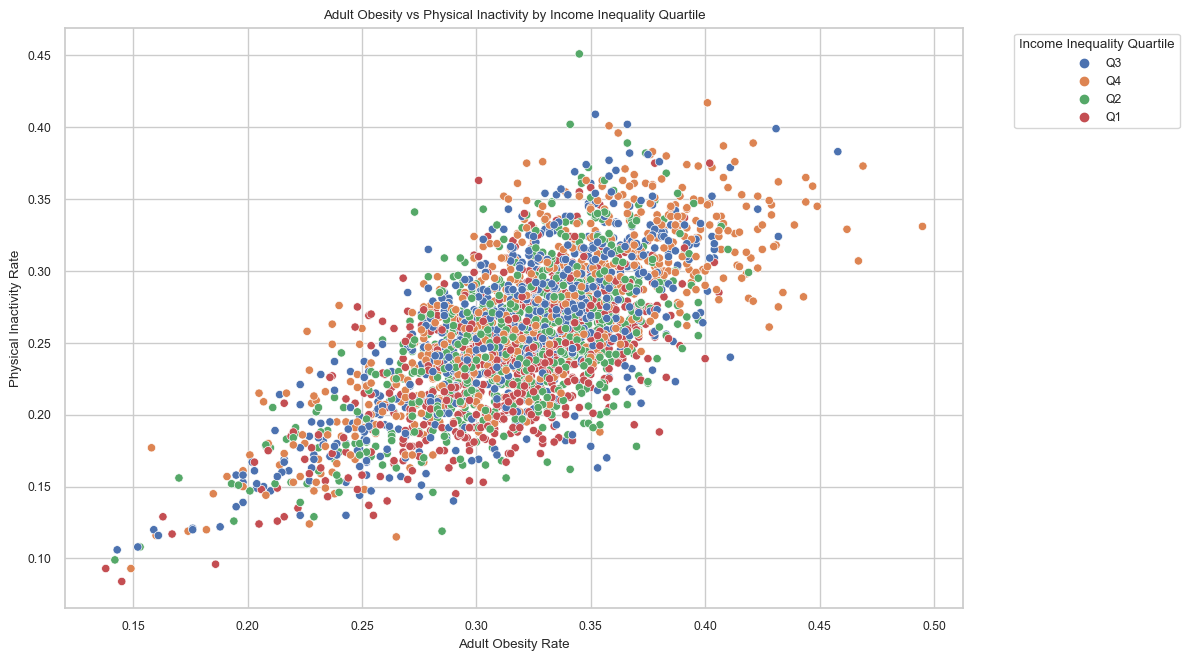

In [24]:
plt.figure(figsize=(12, 6.7))
plot = sns.scatterplot(data=county_data, x='Adult.Obesity', y='Physical.Inactivity', hue='Income.Inequality.Quartile')
plt.title('Adult Obesity vs Physical Inactivity by Income Inequality Quartile')
plt.xlabel('Adult Obesity Rate')
plt.ylabel('Physical Inactivity Rate')
plt.legend(title='Income Inequality Quartile', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.savefig("color3.png", dpi=500)
plt.show()

# Create a predictive model for the y-variable

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = county_data[['Median.Household.Income', 'Proportion.of.Smokers', 'Adult.Obesity', 'Unemployment']]  
y = county_data['Health_Index']  

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the model
tree_model = DecisionTreeRegressor(max_leaf_nodes=10)  # you can adjust max_leaf_nodes
tree_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0007014994108790521


# Tree Model & Variables’ Importance

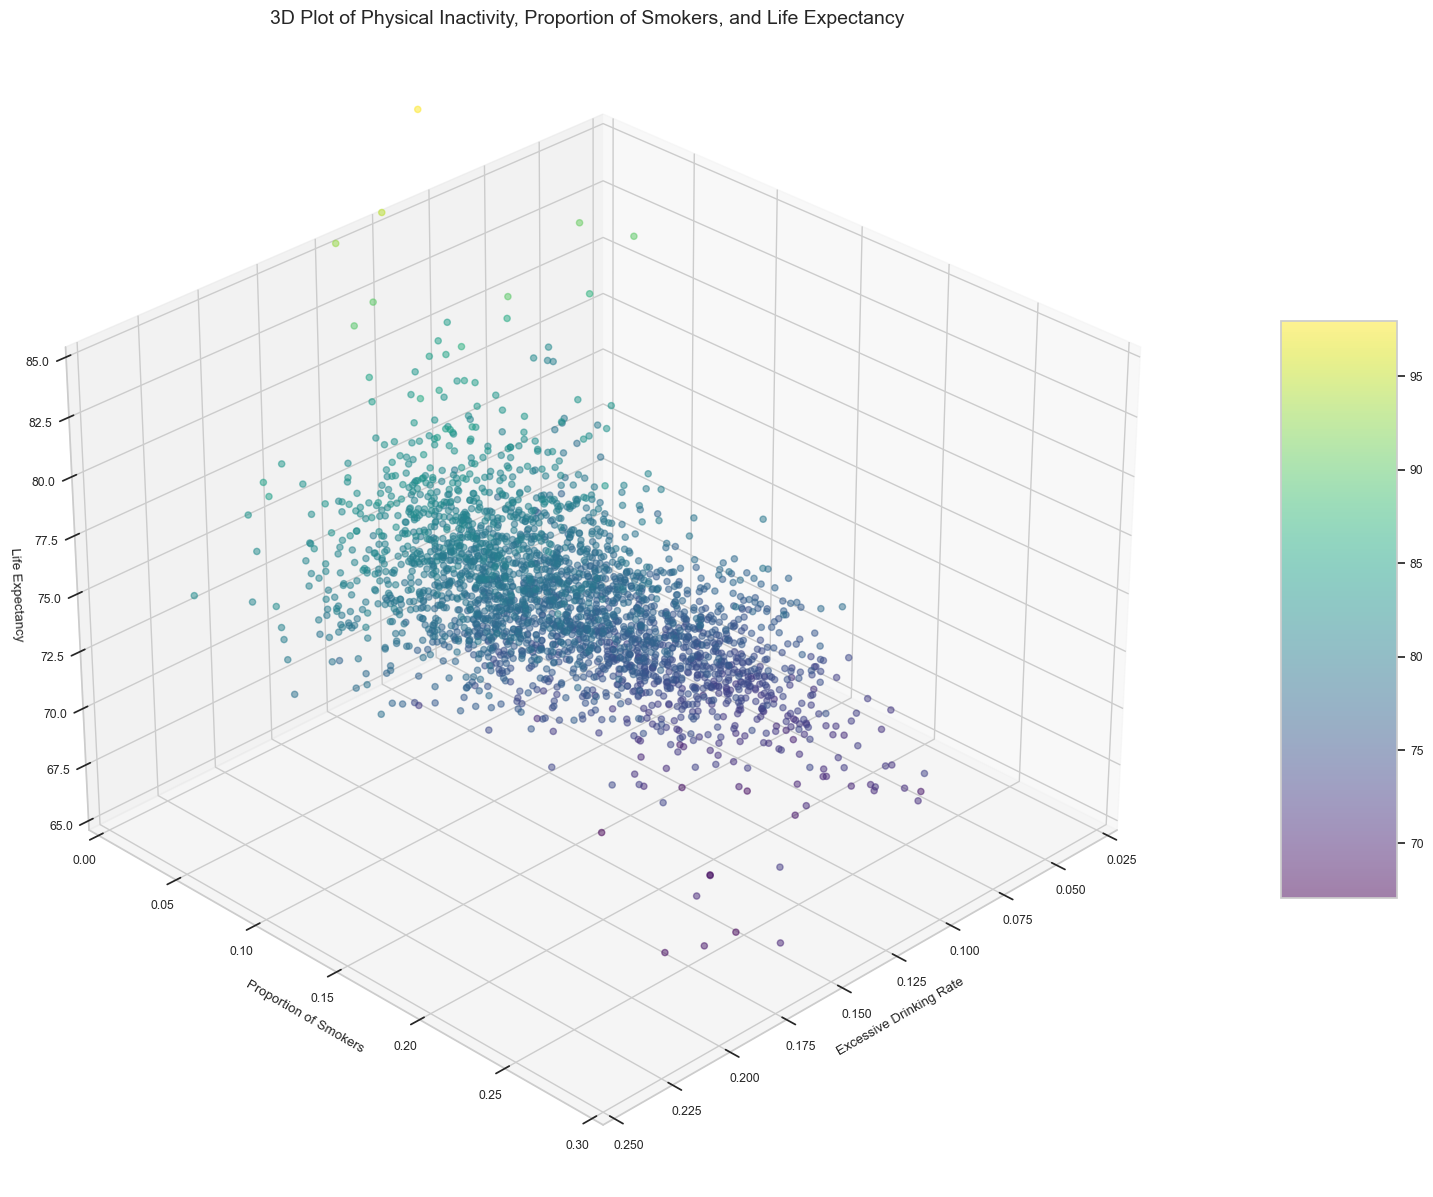

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(111, projection='3d')

# Customize the size of the points using the 's' parameter
sc = ax.scatter(county_data['Excessive.Drinking'], county_data['Proportion.of.Smokers'], county_data['Life.Expectancy'], 
                c=county_data['Life.Expectancy'], cmap='viridis', s=20, alpha=0.5)  

# Set the labels for the axes
ax.set_xlabel('Excessive Drinking Rate')
ax.set_ylabel('Proportion of Smokers')
ax.set_zlabel('Life Expectancy')

# Set the maximum values for the axes
ax.set_xlim(0.025, 0.25)
ax.set_ylim(0, 0.3)
ax.set_zlim(65, 85)

ax.view_init(elev=30, azim=45)

plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)

ax.set_title('3D Plot of Physical Inactivity, Proportion of Smokers, and Life Expectancy', fontsize=14)
plt.show()

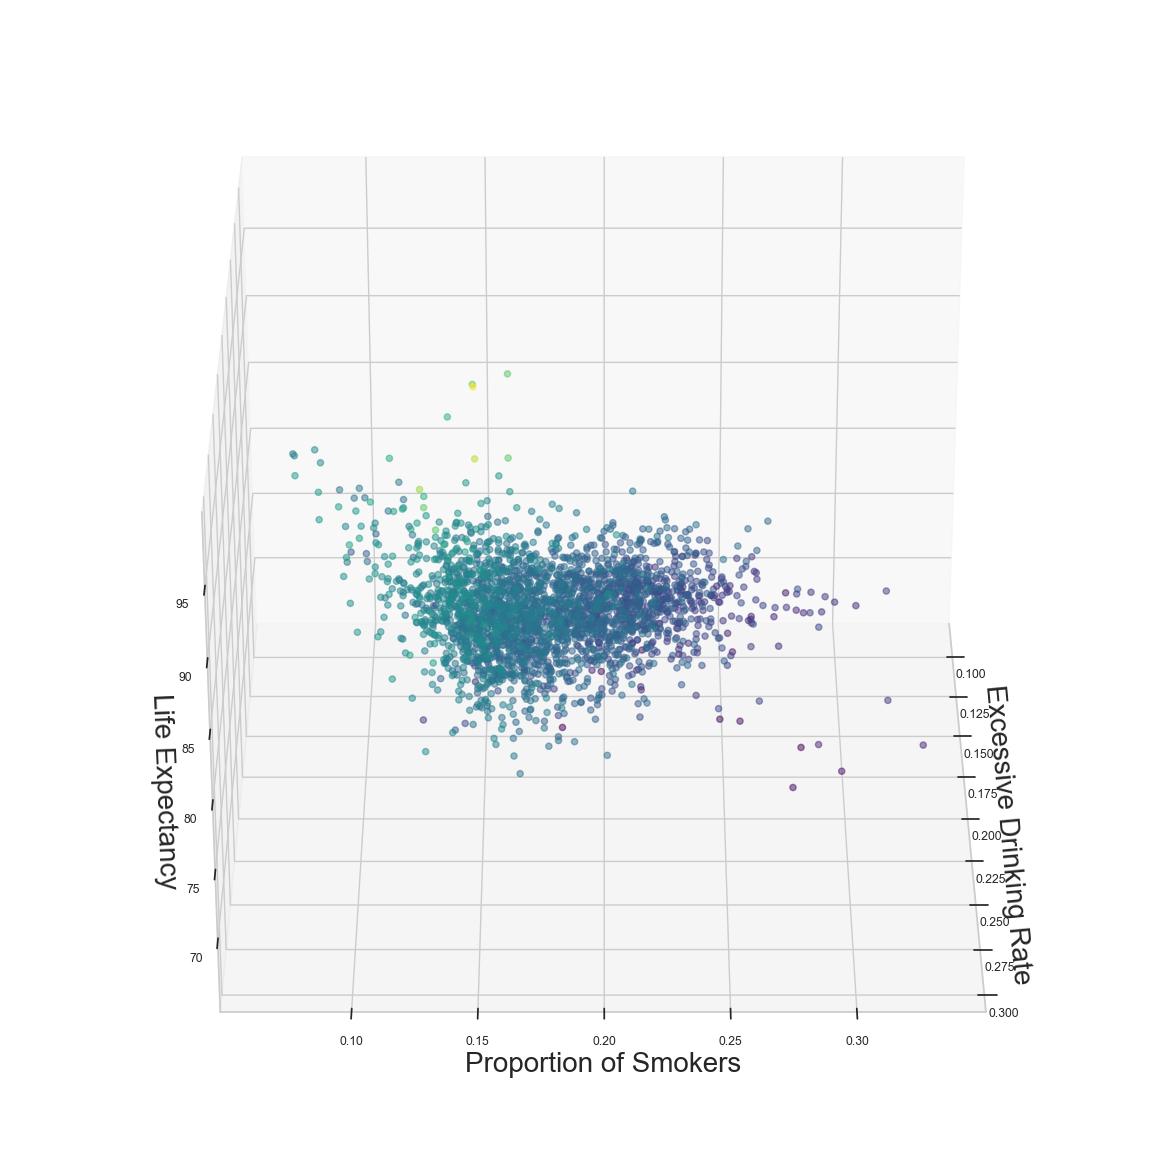

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import pandas as pd
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(county_data['Excessive.Drinking'], county_data['Proportion.of.Smokers'], county_data['Life.Expectancy'], 
                c=county_data['Life.Expectancy'], cmap='viridis', s=20, alpha=0.5)  

ax.set_xlabel('Excessive Drinking Rate', fontsize=20)
ax.set_ylabel('Proportion of Smokers', fontsize=20)
ax.set_zlabel('Life Expectancy', fontsize=20)

def update_frame(angle):
    ax.view_init(elev=30., azim=angle)

ani = animation.FuncAnimation(fig, update_frame, frames=range(0, 360, 5), interval=40)

ani.save('3dplot_rotation_new.gif', writer='pillow', fps=10, dpi=80)

In [16]:
from IPython.display import HTML
file_path = '3dplot_rotation.gif' 
HTML(f'<img src="{file_path}" width="1000">')

                   Feature  Importance
0  Median.Household.Income    0.784666
1    Proportion.of.Smokers    0.181798
3             Unemployment    0.033537
2            Adult.Obesity    0.000000


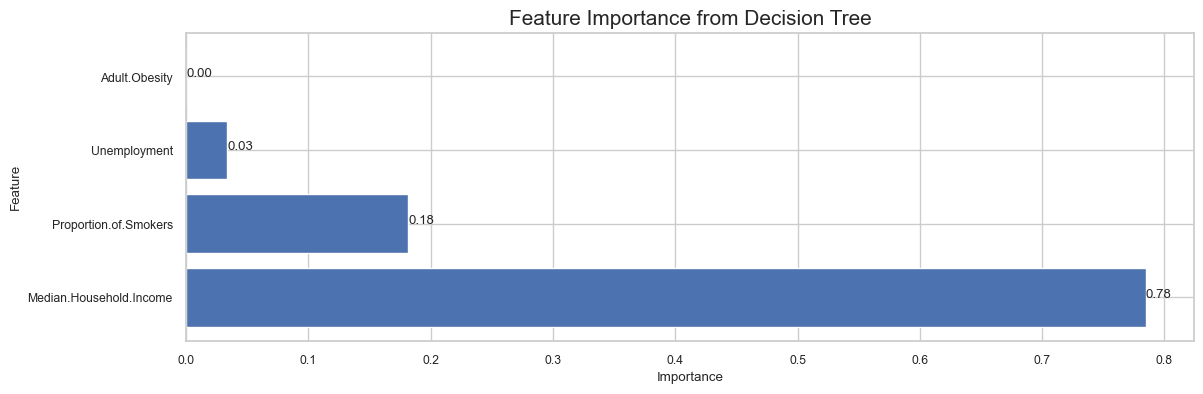

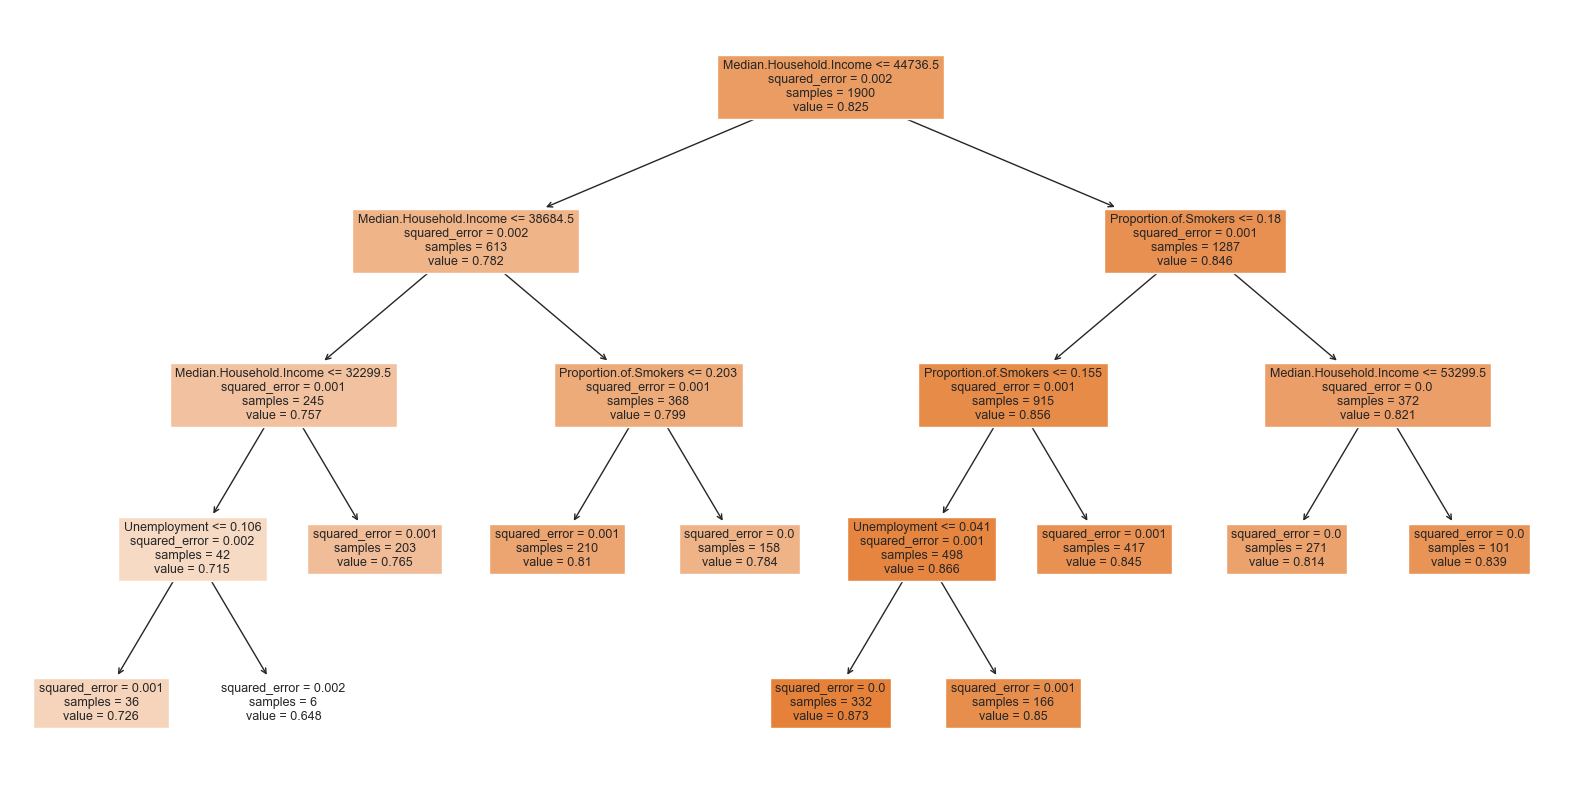

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Variable importance
feature_importance = tree_model.feature_importances_
feature_names = X.columns.tolist()  # Convert feature names to a list
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print variable importance
print(importance_df)

plt.figure(figsize=(13, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree', fontsize=15)
for index, value in enumerate(importance_df['Importance']):
    plt.text(value, index, f"{value:.2f}")
plt.savefig("feature.png", dpi=500)
plt.show()


# Graphical summary of the tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=feature_names, filled=True, fontsize = 9)
plt.savefig("treeproject.png", dpi=500)
plt.show()

# Regression Model

In [18]:
import statsmodels.formula.api as smf

formula = 'Health_Index ~ Q("Median.Household.Income") + Q("Proportion.of.Smokers") + Q("Adult.Obesity") + Q("Unemployment")'
model = smf.ols(formula, data=county_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Health_Index   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1252.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:17:03   Log-Likelihood:                 5977.7
No. Observations:                2715   AIC:                        -1.195e+04
Df Residuals:                    2710   BIC:                        -1.192e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# Correlation Matrix of the Features

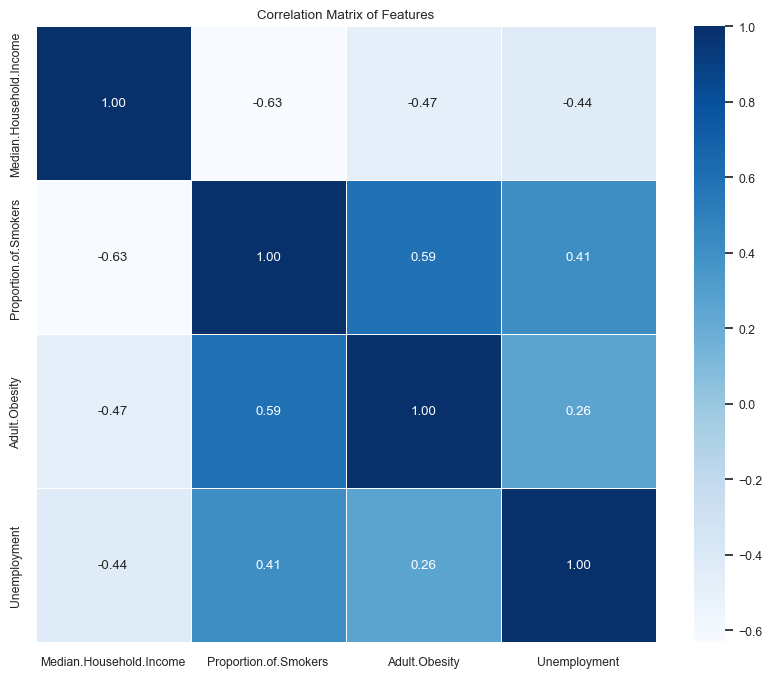

In [75]:
corr_matrix = county_data[predictors].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.savefig("matrixfeature.png", dpi=500)
plt.show()

# Narrative Summary of Findings
## Regression Outcomes:
The regression model exhibits a robust explanatory power with an R-squared statistic of 0.649, denoting that approximately 65% of the variance in the Health Index is accounted for within the model's independent variables. The salient predictors identified - Median Household Income and Proportion of Smokers - carry substantial coefficients indicative of strong associative magnitudes with the Health Index. The positive coefficient of Median Household Income signifies a potentially positive correlation with health outcomes, implying that increments in household income may correspond to enhanced health statuses. In contrast, an inverse relationship is observed with the Proportion of Smokers, underscoring the detrimental health implications of tobacco consumption.

Adult Obesity, though incorporated within the model, fails to achieve statistical significance, as evidenced by its p-value, suggesting a negligible direct effect on the Health Index within the observed data set. The Unemployment rate, bearing a negative coefficient, hints at an adversarial relationship with the Health Index, positing higher unemployment rates as a potential harbinger of inferior health conditions.
## Insights from Decision Tree Analysis:
The decision tree's narrative elucidates the hierarchical significance of the features, positioning Median Household Income as the paramount predictor, followed by the Proportion of Smokers. Unemployment emerges as a lesser but still relevant factor, while Adult Obesity does not manifest a discernible influence in this non-linear modeling.
## Correlation Matrix Insights:
The correlation matrix acts as a diagnostic tool, unveiling the intricate web of interrelationships among the features. A stark negative correlation between Median Household Income and the Proportion of Smokers may reflect socioeconomic gradients in health behaviors. Concurrently, the affinity between the Proportion of Smokers and Adult Obesity potentially delineates a syndemic pattern of risk factors.

# Conslusions
It is imperative to approach these associations with prudence, recognizing that correlation should not be conflated with causation. The observed relationships are potentially symptomatic of more complex socioeconomic dynamics that transcend the scope of this analysis. Moreover, the pronounced condition number alerts us to the presence of multicollinearity, reinforcing the interdependence of predictor variables, as substantiated by the correlation matrix.

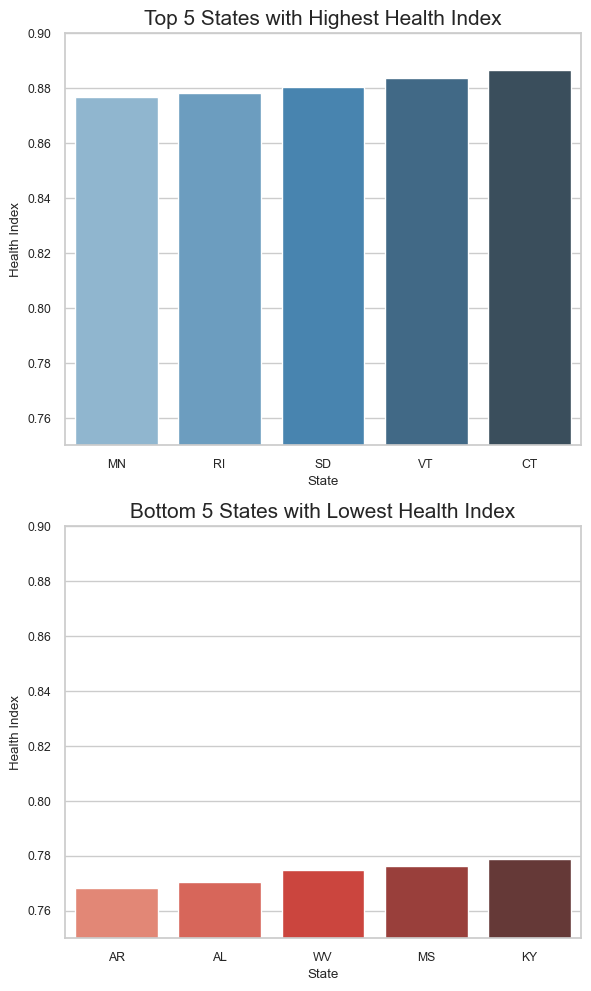

In [73]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for top 5 and bottom 5 states with respect to Health Index
top_5_states = {'MN': 0.876813, 'RI': 0.878220, 'SD': 0.880333, 'VT': 0.883758, 'CT': 0.886683}
bottom_5_states = {'AR': 0.768374, 'AL': 0.770306, 'WV': 0.774953, 'MS': 0.776428, 'KY': 0.778881}

# Convert the data into a format suitable for seaborn
top_5_df = pd.DataFrame(list(top_5_states.items()), columns=['State', 'Health Index'])
bottom_5_df = pd.DataFrame(list(bottom_5_states.items()), columns=['State', 'Health Index'])

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 10))  # 1 row, 2 columns

# Top 5 states plot
sns.barplot(x='State', y='Health Index', data=top_5_df, ax=axs[0], palette="Blues_d")
axs[0].set_title('Top 5 States with Highest Health Index', fontsize=15)
axs[0].set_ylim(0.75, 0.9)  # Adjust y-axis limits for better visibility

# Bottom 5 states plot
sns.barplot(x='State', y='Health Index', data=bottom_5_df, ax=axs[1], palette="Reds_d")
axs[1].set_title('Bottom 5 States with Lowest Health Index', fontsize=15)
axs[1].set_ylim(0.75, 0.9)  # Adjust y-axis limits for better visibility

plt.tight_layout()
plt.savefig("top5.png", dpi=600)
plt.show()


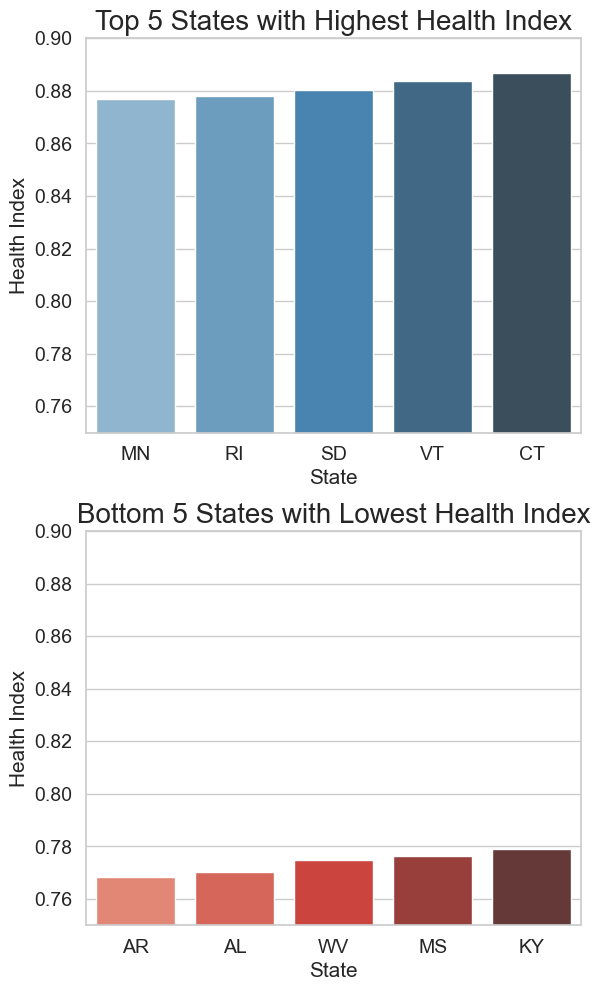

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for top 5 and bottom 5 states with respect to Health Index
top_5_states = {'MN': 0.876813, 'RI': 0.878220, 'SD': 0.880333, 'VT': 0.883758, 'CT': 0.886683}
bottom_5_states = {'AR': 0.768374, 'AL': 0.770306, 'WV': 0.774953, 'MS': 0.776428, 'KY': 0.778881}

# Convert the data into a format suitable for seaborn
top_5_df = pd.DataFrame(list(top_5_states.items()), columns=['State', 'Health Index'])
bottom_5_df = pd.DataFrame(list(bottom_5_states.items()), columns=['State', 'Health Index'])

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 10))  # 1 row, 2 columns

# Top 5 states plot
sns.barplot(x='State', y='Health Index', data=top_5_df, ax=axs[0], palette="Blues_d")
axs[0].set_title('Top 5 States with Highest Health Index', fontsize=20)
axs[0].set_xlabel('State', fontsize=15)
axs[0].set_ylabel('Health Index', fontsize=15)
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_ylim(0.75, 0.9)
# Bottom 5 states plot
sns.barplot(x='State', y='Health Index', data=bottom_5_df, ax=axs[1], palette="Reds_d")
axs[1].set_title('Bottom 5 States with Lowest Health Index', fontsize=20)
axs[1].set_xlabel('State', fontsize=15)
axs[1].set_ylabel('Health Index', fontsize=15)
axs[1].tick_params(axis='both', labelsize=14)
axs[1].set_ylim(0.75, 0.9)
plt.tight_layout()
plt.savefig("top5.png", dpi=500)
plt.show()
